In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import json
import torch
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from inerf.inerf_utils import get_mask_midpt, get_origin

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
DATA_PATH = "/stored_data/jackal_evaluation_data"
INDEX_IMG = 0
with open(os.path.join(DATA_PATH,"ground_truth.json"), 'r') as f:
    ground_truth = json.load(f)
with open(os.path.join(DATA_PATH,"transforms.json"), 'r') as f:
    transforms = json.load(f)

In [4]:
#Get transform
transform = ground_truth["frames"][INDEX_IMG]["transform_matrix"]
transform = torch.tensor([transform])
print(transform)

f = ground_truth["focal_length"]
rho_w = ground_truth["pixel_width"]
rho_h = ground_truth["pixel_height"]
u_0 = ground_truth["cx"]
v_0 = ground_truth["cy"]

#Intrinsic matrix
intrinsic = [
    [f/rho_w, 0, u_0, 0],
    [0, f/rho_h, v_0, 0],
    [0, 0, 1, 0]
]
intrinsic = torch.tensor(intrinsic)
print(intrinsic)

origin_coord = get_origin(transform,intrinsic)
print(origin_coord)

tensor([[[ 0.7735,  0.4365, -0.4595, -1.8563],
         [-0.6334,  0.5572, -0.5369, -2.0390],
         [ 0.0217,  0.7064,  0.7075,  2.5000],
         [ 0.0000,  0.0000,  0.0000,  1.0000]]])
tensor([[1.1286e+03, 0.0000e+00, 6.4000e+02, 0.0000e+00],
        [0.0000e+00, 1.1286e+03, 3.6000e+02, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00]])
tensor([[667.3677, 305.2473]])


In [5]:
mask = cv2.imread(os.path.join(DATA_PATH,transforms["frames"][INDEX_IMG]["mask_path"]), cv2.IMREAD_GRAYSCALE)
mask = np.array(mask)
mask_centre = get_mask_midpt(mask)

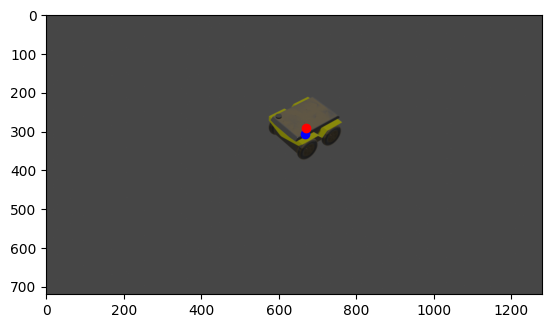

In [6]:
img = cv2.imread(os.path.join(DATA_PATH,transforms["frames"][INDEX_IMG]["file_path"]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Plot pixel coord
plt.imshow(img)
plt.scatter(origin_coord[:,0], origin_coord[:,1], c='b')
plt.scatter(mask_centre[0], mask_centre[1], c='r')
plt.show()